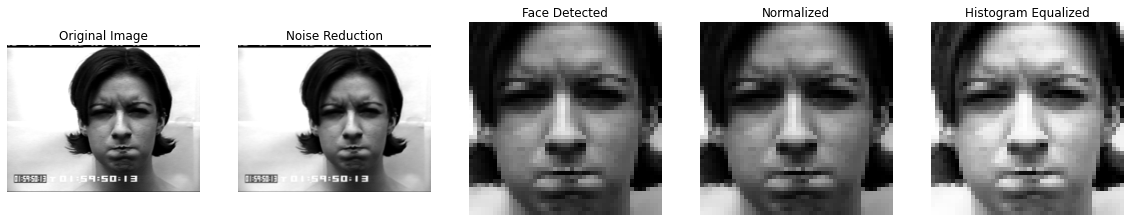

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path, face_cascade, image_size=(48, 48)):
    original_image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Noise Reduction
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Face Detection
    faces = face_cascade.detectMultiScale(blurred_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
    for (x, y, w, h) in faces:
        face_image = blurred_image[y:y+h, x:x+w]
        face_image_resized = cv2.resize(face_image, image_size)

        # Normalization
        normalized_image = face_image_resized.astype('float32') / 255.0

        # Histogram Equalization
        equalized_image = cv2.equalizeHist(np.uint8(normalized_image * 255))

        return gray_image, blurred_image, face_image_resized, normalized_image, equalized_image

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

dataset_path = '../PR Project/CK+'
expression_folders = os.listdir(dataset_path)
first_image_path = os.path.join(dataset_path, expression_folders[0], os.listdir(os.path.join(dataset_path, expression_folders[0]))[0])

gray_image, blurred_image, face_image, normalized_image, equalized_image = load_and_preprocess_image(first_image_path, face_cascade)

# Plotting the images
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(blurred_image, cmap='gray')
axes[1].set_title('Noise Reduction')

axes[2].imshow(face_image, cmap='gray')
axes[2].set_title('Face Detected')

axes[3].imshow(normalized_image, cmap='gray')
axes[3].set_title('Normalized')

axes[4].imshow(equalized_image, cmap='gray')
axes[4].set_title('Histogram Equalized')

for ax in axes:
    ax.axis('off')

plt.show()
